In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# EDA

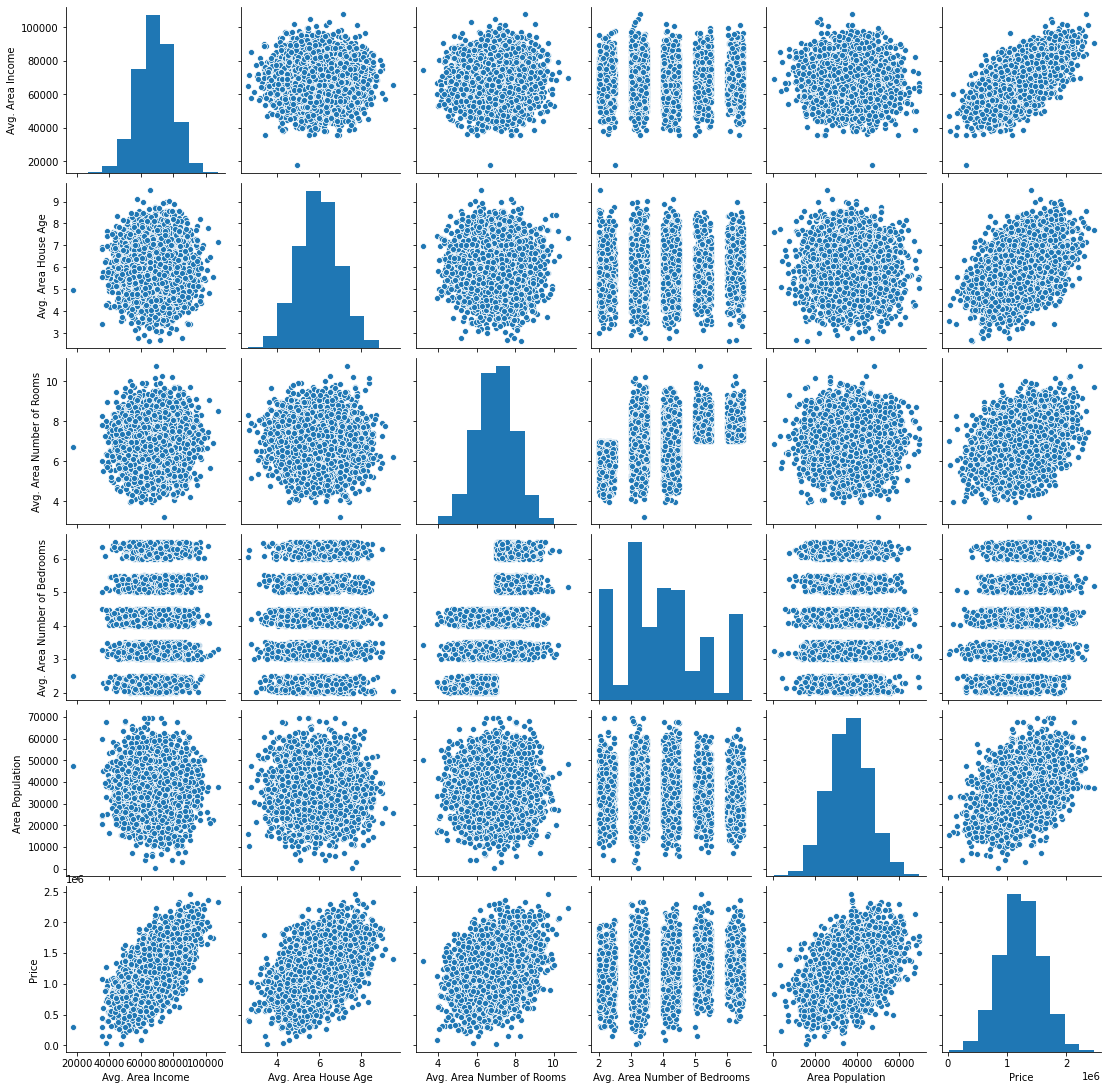

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price'>

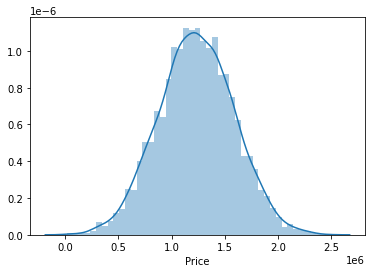

In [12]:
sns.distplot(df['Price'])

In [13]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

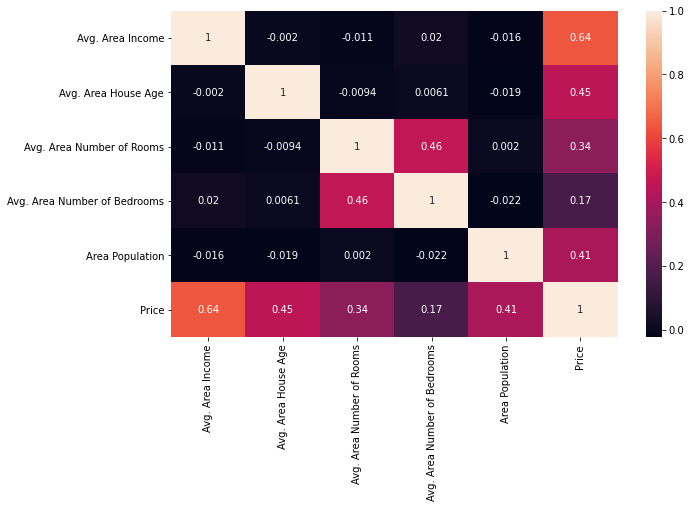

In [18]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

# Training a Linear Regression Model

# Split data

In [26]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [28]:
df.drop(['Address'], inplace = True, axis = 1)

In [29]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [31]:
X = df.iloc[:, :-1]

In [33]:
y = df['Price']

In [34]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [35]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [44]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
412,67217.486144,4.617497,6.264975,4.19,23999.755217
1661,48735.924512,5.543730,6.091906,2.43,19682.347295
977,64303.640094,5.626373,6.583252,3.42,20214.598002
530,73119.720411,7.058046,7.146515,5.44,35426.690128
3539,59609.274997,4.926836,7.583466,5.37,37432.689317
...,...,...,...,...,...
4473,65893.447734,4.968479,6.665318,4.10,28173.790022
580,61644.173612,7.163657,7.751754,5.17,27809.135077
163,73204.942132,6.640916,7.311912,6.40,35090.500810
4703,67650.257791,5.953715,4.675286,4.18,28532.709823


# Training Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluate

In [48]:
print(model.intercept_)

-2638450.842817499


In [49]:
print(model.coef_)

[2.16632340e+01 1.65248825e+05 1.20689088e+05 1.27975648e+03
 1.51727728e+01]


In [50]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])

In [51]:
coeff_df

,Coefficient
Avg. Area Income,21.663234
Avg. Area House Age,165248.824639
Avg. Area Number of Rooms,120689.087544
Avg. Area Number of Bedrooms,1279.756478
Area Population,15.172773


# Prediction

In [52]:
predictions = model.predict(X_test)
predictions

array([1358995.27516973,  939616.94657254, 1260758.27242475,
       1073148.92564147,  861116.98198486, 1664242.98814302,
       1185761.86465315,  720241.45830458, 1193174.62650026,
       1112509.06338857,  740476.73812762, 1277224.98824643,
       1437286.31446814,  484436.85478009, 1107821.04854729,
       1488117.60364774, 1337276.69483346,  690248.89168485,
        769374.5376124 , 1129267.47771845,  640809.08586512,
       1113198.27625456,  631886.80314827, 1671783.01702875,
        991875.03744977, 1009104.62258804, 1525165.62875086,
        713171.66315255, 1683763.78366858,  533228.74000476,
       1791279.40808148, 1016204.12979797,  982253.94951143,
       1481373.87977275,  775812.99164512,  835443.82587536,
       1388532.91778732, 1566601.0750648 , 1803355.2347576 ,
       1109253.22253112, 1099191.19611211, 1252617.27457446,
        692073.14570176,  952739.22824345,  689412.30756624,
       1311026.06493121, 1470689.0125969 , 1192907.97712625,
        882357.30897108,

In [56]:
X_test['Prediction'] = predictions

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Prediction
4988,67637.840665,7.056673,5.774409,3.05,43846.531340,1.358995e+06
1827,65423.246922,5.756826,6.353157,3.13,28914.791456,9.396169e+05
2478,70085.947604,4.435761,7.131110,5.22,51446.691846,1.260758e+06
3116,63223.369612,4.944631,8.087357,3.32,35891.806163,1.073149e+06
3033,48483.942302,6.082065,7.405949,5.05,35848.081267,8.611170e+05
...,...,...,...,...,...,...
2567,57730.322004,5.105381,9.001899,6.06,42451.306285,1.194123e+06
3530,61724.735734,4.490118,7.466360,4.42,20743.094896,6.621883e+05
597,64823.015835,5.079006,7.053927,5.12,36481.327752,1.016532e+06
3330,68735.436608,7.721909,7.621975,5.18,27640.561286,1.472520e+06


<AxesSubplot:xlabel='Price'>

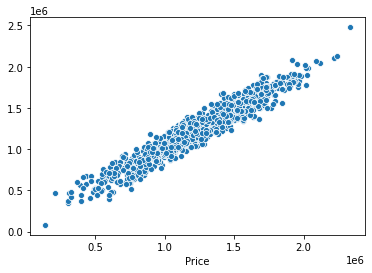

In [58]:
sns.scatterplot(y_test, predictions)

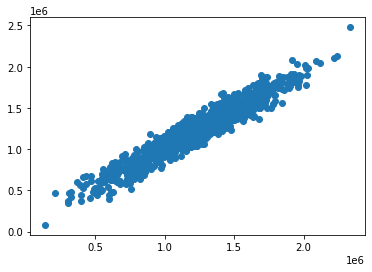

In [59]:
plt.scatter(y_test, predictions)

# Residuals

<AxesSubplot:xlabel='Price'>

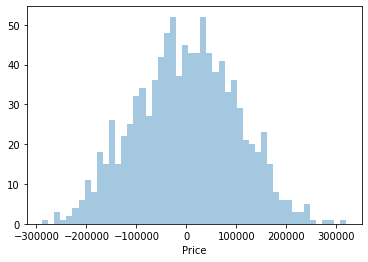

In [62]:
sns.distplot((y_test - predictions), kde = False, bins = 50)

# Evaluation Metrics

In [66]:
# Case 1: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,10]
# Case 2: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,12]

# MAE for case 1 = 2.0 RMSE for case 1 = 2.0 
# MAE for case 2 = 2.5 RMSE for case 2 = 2.65

In [64]:
from sklearn import metrics

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81927.02544986519
MSE: 10205061771.63816
RMSE: 101020.10577918714


# Score

In [70]:
print(model.score(X,y)*100) 

91.80138733805107
